In [1]:
# 여기서 나오는 ip(IPv4)를 밑에 ip란에 입력합니다. 
!ipconfig


Windows IP ����


�̴��� ����� �̴���:

   ���Ằ DNS ���̻�. . . . : kornet
   ��ũ-���� IPv6 �ּ� . . . . : fe80::c98c:cb43:6da9:26ec%16
   IPv4 �ּ� . . . . . . . . . : 14.39.137.237
   ����� ����ũ . . . . . . . : 255.255.255.0
   �⺻ ����Ʈ���� . . . . . . : 14.39.137.254


In [1]:
import cx_Oracle
# 'localhost'로 가능하셨던 분들은 위 작업 필요 없이 localhost 하시면 됩니다.
dsn = cx_Oracle.makedsn('14.39.137.237',1521,sid ='xe')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=14.39.137.237)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=xepdb1)))'

In [2]:
db = cx_Oracle.connect('C##CAKD5','cakd5',dsn)
db

<cx_Oracle.Connection to LM_PDB@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=14.39.137.237)(PORT=1521))(CONNECT_DATA=(SERVICE_NAME=xepdb1)))>

In [3]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from book')
x = cursor.fetchall()
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4
0,00001,594,463,54041667.0,31000883.0
1,00002,610,506,46245330.0,53635430.0
2,00003,739,452,1893769.0,1271398.0
3,00004,442,488,9299616.0,7394194.0
4,00005,507,212,7685880.0,5551190.0


In [4]:
cursor.execute("select column_name from user_tab_columns where table_name = 'book'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df.columns = col_new
df

In [14]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from PUR_MONTH')
x = cursor.fetchall()
cursor.execute("select column_name from user_tab_columns where table_name = 'PUR_MONTH'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df = pd.DataFrame(x,columns=col_new)
df

,MONTH,PN2014,PN2015,PP2014,PP2015
0,1,1106371,1258299,28249481923,27754411656
1,2,959404,1103053,22817825296,27685969964
2,3,1151894,1257871,26627455524,29014094335
3,4,1125872,1265045,26412673959,29084253034
4,5,1194879,1313636,28456014251,30894338286
5,6,1170962,1276194,25677279187,24856082870
6,7,1229122,1330313,24578376885,26064429334
7,8,1213974,1292718,24884479432,25333691751
8,9,1120658,1172602,25486858340,28138429915
9,10,1200557,1138213,30603047718,31990295501


In [1]:
# create
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = 'create table sample1(id varchar2(10), score number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [3]:
# insert
def insert(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample1 (id, score) values(:1,:2)'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
insert(('111',80))

In [4]:
# insert - executemany
rows = [('112',90),('113',70),('114',80),('115',90),('116',85)]
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample1 (id, score) values(:1,:2)'
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertmany(rows)

In [24]:
# Q. 세 개의 속성(col01,col02,col03)으로 구성되는 테이블을 생성하고 10개의 데이터를 입력하세요.(사용자 함수 사용)
# 단, col01에 대하여 제약조건 primary key 섫정 (제약조건 이름 sample_pk)
import numpy as np
names = ['문성윤','어정호','조남현','마경수','이재호','김기연','김태형','최종원','이동연','김기현']
foods = ['일식','중식','한식','분식']
area = ['이대','신촌','망원','홍대']
rows = []
for i in range (10):
    rows.append(tuple(list(names[i])) + tuple(np.random.choice(foods,size=1)) + tuple(np.random.choice(area,size=1)))

def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample (names, foods, area) values(:1,:2,:3)'
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertmany(rows)

DatabaseError: ORA-01036: 잘못된 변수명/번호

In [30]:
names[0]

'문성윤'

In [25]:
rows

[('문', '성', '윤', '일식', '망원'),
 ('어', '정', '호', '중식', '망원'),
 ('조', '남', '현', '일식', '신촌'),
 ('마', '경', '수', '분식', '신촌'),
 ('이', '재', '호', '중식', '망원'),
 ('김', '기', '연', '한식', '망원'),
 ('김', '태', '형', '한식', '신촌'),
 ('최', '종', '원', '중식', '망원'),
 ('이', '동', '연', '한식', '신촌'),
 ('김', '기', '현', '일식', '이대')]

In [31]:
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = "create table sample2(col01 varchar2(10), col02 varchar2(10),col03 varchar2(10),constraint sample_pk primary key(col01))"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [32]:
# insert - executemany
def insertcol(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql ="insert into sample2 (col01,col02,col03) values(:1,:2,:3)"
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
rows = [('10','1','1'),('1','8','1'),('2','1','1'),('3','1','1'),('4','1','1'),('5','1','1'),('6','1','1'),('7','1','1'),('8','1','1'),('9','1','1')]
insertcol(rows)

In [35]:
# update
def updatecol(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql ="update sample2 set col03=:1 where col01=:2"
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
updatecol(('3','1'))

In [37]:
# delete
def deletecol(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = 'delete from sample2 where col01 = :1'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
deletecol(('10',))

In [40]:
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
cursor.execute('select * from sample2')
x = cursor.fetchall()
df_col = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'SAMPLE2'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df_col.columns = col_new
df_col.head()

,COL01,COL02,COL03
0,1,8,3
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [41]:
df_col.to_csv('./data/col3.csv')

In [42]:
import csv
with open('./data/col3.csv','r',encoding="UTF-8") as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))


In [43]:
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = 'alter table sample2 drop constraint sample_pk'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [44]:
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample2 (col01,col02,col03) values(:1,:2,:3)"
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
    cursor.executemany(sql,data)
    cursor.close()
    con.commit()
    con.close()

In [57]:
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = "create table sample3(id varchar2(10), sales number)"
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [45]:
# 대량 데이터 입력
import numpy as np
import pandas as pd
df = pd.DataFrame()
df['id'] = np.arange(10000)
df['sales'] = np.random.randint(1,100,size=10000)
df.head()

,id,sales
0,0,27
1,1,19
2,2,17
3,3,71
4,4,75


In [54]:
df.id = df.id.astype('str')

In [58]:
rows = list(tuple(i) for i in df.values)
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
    cursor = con.cursor()
    sql = 'insert into sample3 (id, sales) values(:1,:2)'
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
insertmany(rows)

In [ ]:
# Q. id의 자료타입을 number로 변경하여 id 기준으로 오름차순 정렬하여 출력하시오.

In [61]:
rows = list(tuple(i) for i in df.values)

con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = 'truncate table sample3'
cursor.execute(sql)
sql = 'alter table sample3 modify(id number)'
cursor.execute(sql)
sql = 'insert into sample3 (id, sales) values(:1,:2)'
cursor.executemany(sql,rows)
cursor.close()
con.commit()
con.close()

[과제] employees 테이블을 불러와서 다음 사항을 수행하세요.  

- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력  
- department_id별 평균 연봉을 출력  
- 부서별 평균 연봉을 수평 그래프로 시각화  

In [93]:
# 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/cakd5@14.39.137.237:1521/xe')
cursor = con.cursor()
sql = 'select * from employees'
cursor.execute(sql)
x = cursor.fetchall()
cursor.execute("select column_name from user_tab_columns where table_name = 'EMPLOYEES'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df = pd.DataFrame(x,columns=col_new)
cursor.close()
con.close()
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [94]:
# department_id별 평균 연봉을 출력
df1 = df.loc[:,['DEPARTMENT_ID','SALARY']]
grouped = df1.groupby('DEPARTMENT_ID')
df2 = grouped.mean()
df2

,SALARY
DEPARTMENT_ID,
10.0,4400.000000
20.0,9500.000000
30.0,4150.000000
40.0,6500.000000
50.0,3475.555556
60.0,5760.000000
70.0,10000.000000
80.0,8955.882353
90.0,19333.333333


Text(0, 0.5, 'DEPARTMENT_ID')

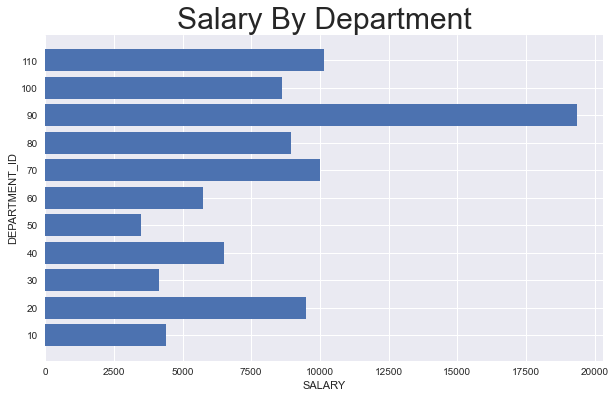

In [108]:
# 부서별 평균 연봉을 수평 그래프로 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
plt.title('Salary By Department',size = 30)
ax1.barh(np.arange(len(df2.index)),df2['SALARY'])
plt.yticks(np.arange(len(df2.index)),list(int(i) for i in df2.index))
ax1.set_xlabel('SALARY')
ax1.set_ylabel('DEPARTMENT_ID')

[과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요.

    - 고객별 2014년 2015년 총구매액 및 평균구매액 출력
    - 고객별 2014 VS 2015 총구매액 기준 성장율

In [ ]:
import pandas as pd
dsn = cx_Oracle.makedsn('14.39.137.237',1521,service_name ='xepdb1') # ip 자리에 'localhost'
db = cx_Oracle.connect('LM_PDB','LM',dsn)
cursor = db.cursor()
cursor.execute('select * from PURBYYEAR2')
x = cursor.fetchall()
cursor.execute("select column_name from user_tab_columns where table_name = 'PURBYYEAR2'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df = pd.DataFrame(x,columns=col_new)
df.to_pickle('./df_purbyyear2.pkl')

In [111]:
df_purbyyear2 = pd.read_pickle('./data/df_purbyyear2.pkl')
df = df_purbyyear2.set_index('고객번호')
df = df.drop(['14년구매건수','15년구매건수'],axis=1)
df = df.fillna(0)
df['성장률'] = np.round(df['15년구매총액'] / df['14년구매총액'],1)
df['성장률'][df['성장률']==np.inf] = 0
df

,14년구매총액,15년구매총액,성장률
고객번호,,,
00001,54041667.0,31000883.0,0.6
00002,46245330.0,53635430.0,1.2
00003,1893769.0,1271398.0,0.7
00004,9299616.0,7394194.0,0.8
00005,7685880.0,5551190.0,0.7
...,...,...,...
19379,1190620.0,4588660.0,3.9
19380,522700.0,3390277.0,6.5
19381,0.0,6040669.0,0.0


In [115]:
# 고객별 2014 VS 2015 총구매액 기준 성장율이 2배 이상인 고객
df['성장률'][df['성장률'] >= 2]

고객번호
00012     2.2
00025     4.2
00084     2.7
00085     2.1
00094     3.1
         ... 
19376    24.9
19377    27.9
19378    37.9
19379     3.9
19380     6.5
Name: 성장률, Length: 1434, dtype: float64